In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, prepare_nway_results
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in distance + nnmag mode

In [3]:
magnitude_columns = [
                    ('nnmag_grz', '../1_desi-photo-prior/model/nnmag_grz.csv'),
                    ('nnmag_grzw1', '../1_desi-photo-prior/model/nnmag_grzw1.csv'),
                    ('nnmag_grzw1w2', '../1_desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('rel_dered_mag_g', '../1_desi-photo-prior/model/rel_dered_mag_g.csv'),
                    ('rel_dered_mag_r', '../1_desi-photo-prior/model/rel_dered_mag_r.csv'),
                    ('rel_dered_mag_z', '../1_desi-photo-prior/model/rel_dered_mag_z.csv'),
                    ('rel_dered_g_r', '../1_desi-photo-prior/model/rel_dered_g_r.csv'),
                    ('rel_dered_r_z', '../1_desi-photo-prior/model/rel_dered_r_z.csv'),
                    ('rel_dered_g_z', '../1_desi-photo-prior/model/rel_dered_g_z.csv'),
                    # 
                    ]




ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns = magnitude_columns)

nway_args = {'match_radius':30, 'prior_completeness':1, 'mag_include_radius': 5.0,
'store_mag_hists': True,}


matching: healpix hashing on pixel resolution ~ 36.072607 arcsec (nside=4096)
100%|██████████| 2425459/2425459 [00:09<00:00, 252833.86it/s]
matching: collecting from 49540 buckets, creating cartesian products ...
100%|██████████| 49540/49540 [00:01<00:00, 31015.81it/s]
matching: 2139365 unique matches from cartesian product. sorting ...
    adding angular separation columns
matching: 108260 matches after filtering by search radius
Primary catalogue "EROSITA" (6885), density gives 1.86e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 6885/6885 [00:02<00:00, 2585.50it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


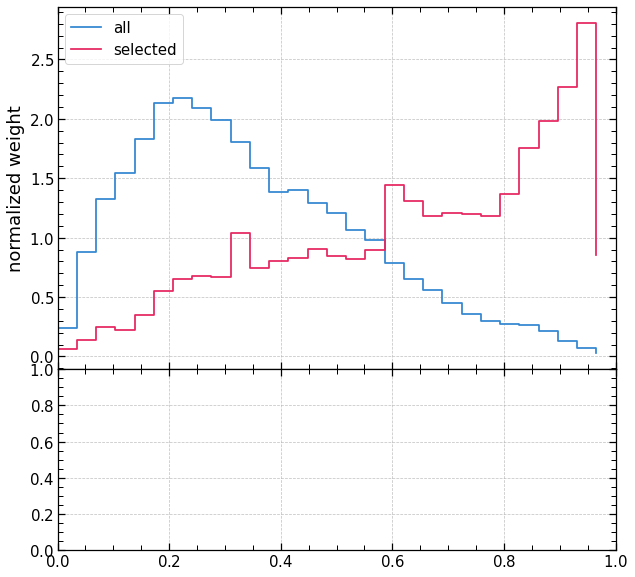

Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1"


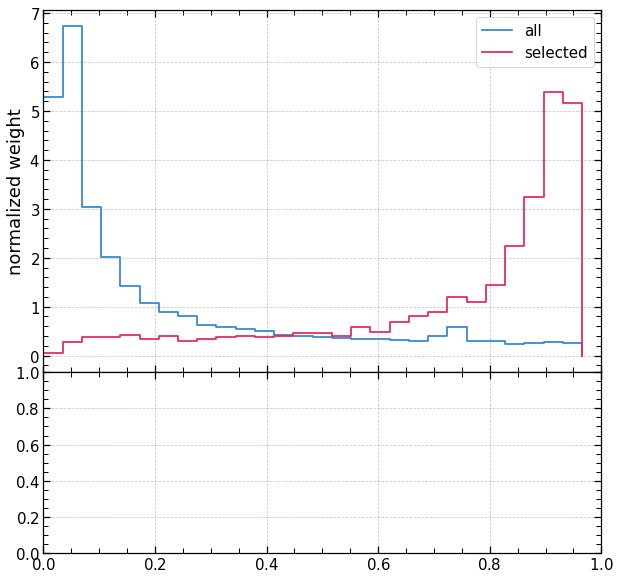

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


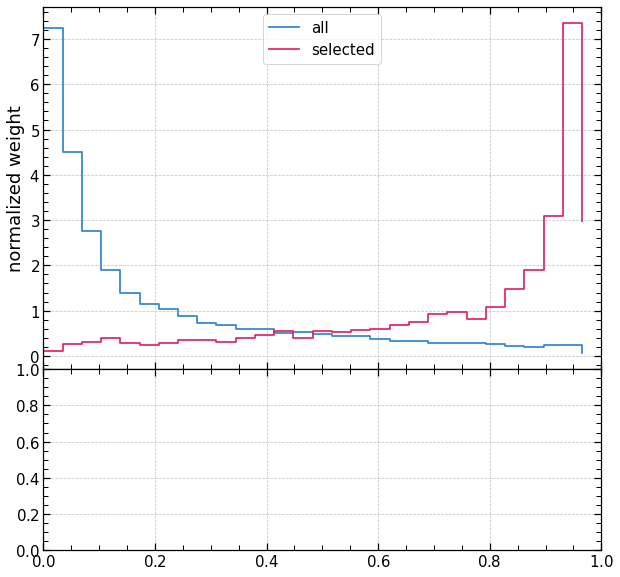

Incorporating bias "DESI:rel_dered_mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_g"


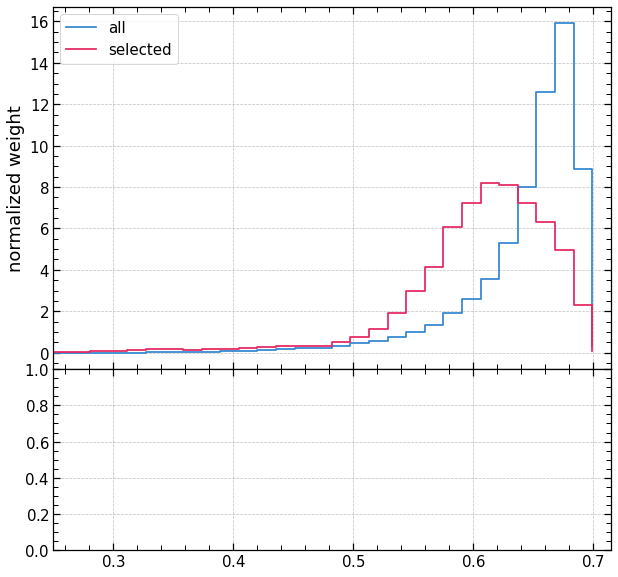

Incorporating bias "DESI:rel_dered_mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_r"


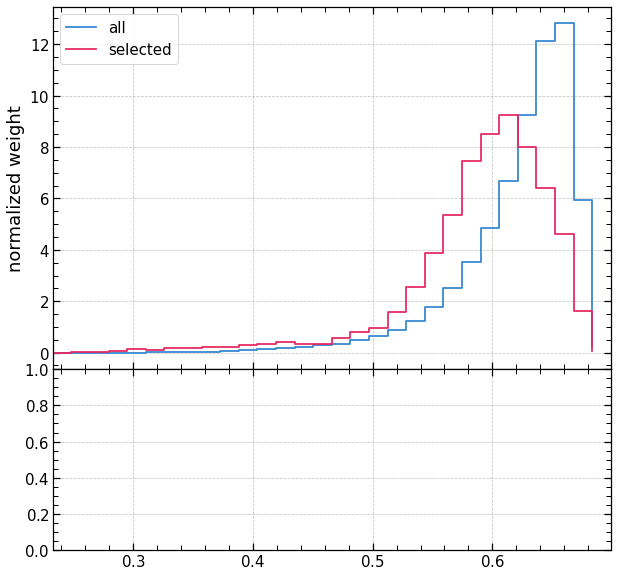

Incorporating bias "DESI:rel_dered_mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_z"


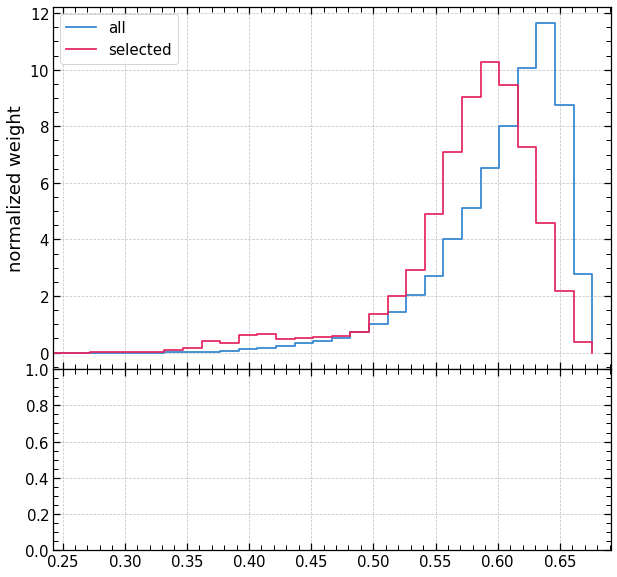

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_r"


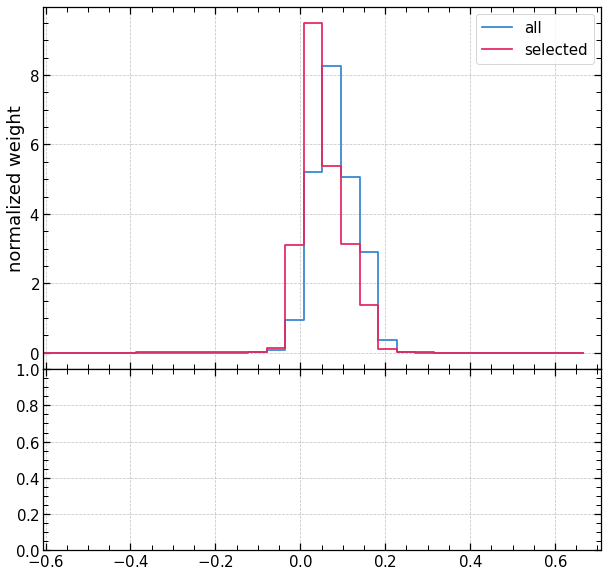

Incorporating bias "DESI:rel_dered_r_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_r_z"


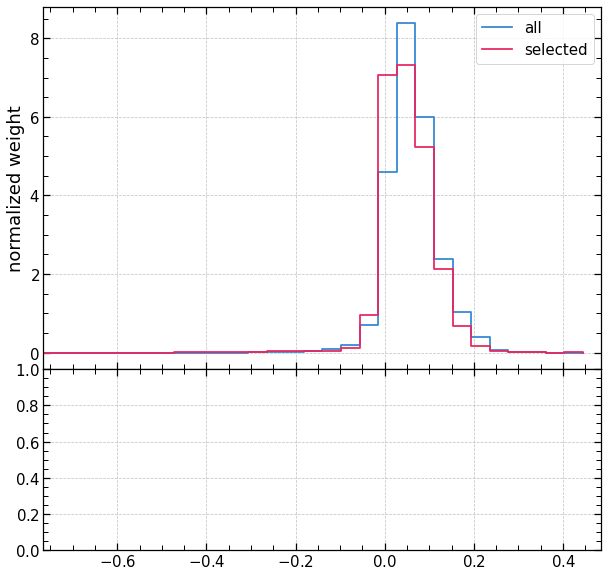

Incorporating bias "DESI:rel_dered_g_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_z"


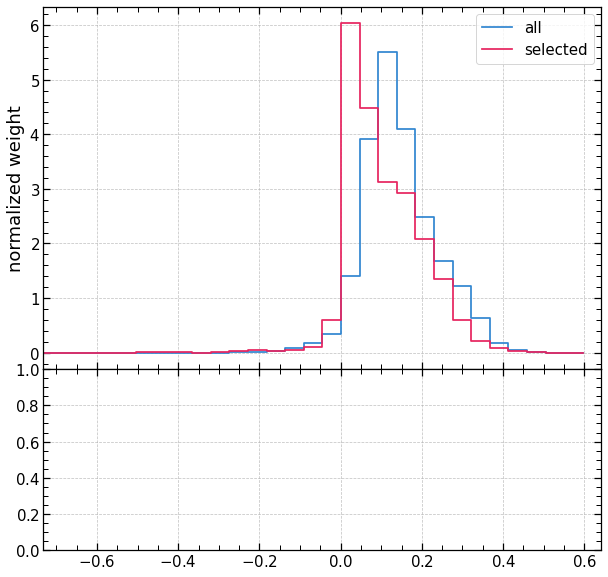


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:447: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  table = table.groupby(table.columns[0], sort=False).apply(compute_group_statistics)


In [4]:

nway_res_orig = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res, nway_res_random);

In [5]:
from scripts.cross_match_scripts import prepare_nway_results

nway_res, nway_res_best = prepare_nway_results(nway_res_orig,
                        ero_for_nway_fits = "ERO_lhpv_03_23_sd01_a15_g14.fits",
                        desi_for_nway_fits = "desi_lh.fits",
                        ero_full_cat = 'ERO_lhpv_03_23_sd01_a15_g14.pkl',
                        desi_full_cat = 'desi_lh.gz_pkl',
                        ero_desi_ctps_file = 'validation_ctps_ero_desi_lh.csv')


/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr

conjugation test passed
number of incorrect matches:  25  out of  529  validation sources
assigning nway_match_flag=2 to all incorrect matches
assigning nway_match_flag=1 to the corresponding correct pairs desi_id -- desi_id_true


In [6]:
nway_res.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl', compression='gzip')

nway_res_best.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')

# Catalog of best matches

`ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl` - all possible matches for a given `srcname_fin`, i.e. a few DESI objects per eROSITA object. 


`ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.pkl` - catalog of the most-probable matches, i.e. one DESI object per eROSITA object. The first file is found as a query `match_flag==1` on `ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates` catalog.  Another addition for this catalog is that the counterparts are always correct if the true counterpart is known from the validation catalog.



`ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only.gz_pkl` and `ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only_all_candidates.gz_pkl` - the same as above but only astrometric information is used to determine the counterparts probabilities, also some columns for photometric prior are absent.



**Description**:


204 columns


X-ray data:
* columns from `srcname_fin` to `NH` - original columns of Lockman Hole eROSITA catalog. 

`pos_sigma_2d` from the X-ray data is used as a positional error for Nway.

Cross-match results:

* `desi_id` - DESI candidate counterpart. `desi_id` is a concatenation of `release`, `brick` and `objid` of the DESI catalog.
* `desi_id_true` - True DESI counterpart id if it is known from validation catalog. It is available for  approximately 600-700 sources eROSITA sources. Includes  hostless sources.  **Warning**: not all best matches  have `desi_id` == `desi_id_true` since the NWAY is not perfect.  
* `nway_Separation_EROSITA_DESI` - separation between `desi_id` and eROSITA source `srcname_fin`. 
* `nway_prob_has_match` - Nway probability of having a match in any of candidate counterparts. Generally, if `nway_prob_has_match`>~0.8, the match is secure, and if `nway_prob_has_match`<~0.2, the match is not secure.
* `nway_prob_this_match` - assuming that eROSITA source has a match, this is the probability of this particular DESI source being a counterpart. 
* `nway_match_flag` - flag indicating whether the source is a primary match (the largest `nway_prob_this_match`, `nway_match_flag=1`), a secondary match (`nway_prob_this_match`/`nway_prob_this_match(best match)>0.5`, `nway_match_flag=2`) or a low-probabbility match (`nway_prob_this_match`/`nway_prob_this_match(best match)<0.5`, `nway_match_flag=0`).
* `nway_n_match_flag_0` - number of DESI sources inside 30 arcsec radius of the eROSITA source which are `nway_match_flag==0`.
* `nway_n_match_flag_2` - the same as `nway_n_match_flag_0` but for `nway_match_flag==2`.
* `nway_is_closest` - True if the DESI candidate counterpart is the closest to the eROSITA source.
* `nway_is_within_pos_r98` - True if the DESI candidate counterpart is within the position error `pos_r98` of the eROSITA source.

Optical data:

* columns starting with `nway_photometry_` are columns which encode DESI photometric information used by Nway to calculate match probability. It includes  `nway_photometry_nnmag_grz(w1w2)_orig` (note `_orig` suffix) - Magnitude of the Neural network photometric classifier. The largre the number, the more likely the source is a counterpart to a generic X-ray source.

* columns starting with `desi_`  are the columns of the DESI catalog for a `desi_id`. Some columns are produced by a SB's function `desi_reliable_magnitudes` (e.g. columns `desi_rel_dered_lg(Fx/Fo_g)`).




Only reliable (SN>3) dereddened magnitudes  are used for the photometric probabilities, and SN>4 dereddened magnitudes are used for photometric model training excluding the Lockman Hole area.

 Completeness = 94% 
 Purity = 95% 
 nway_prob_has_match optimal cutoff =  0.13 
 Fraction of sources with prob_has_match > 0.13 = 92%


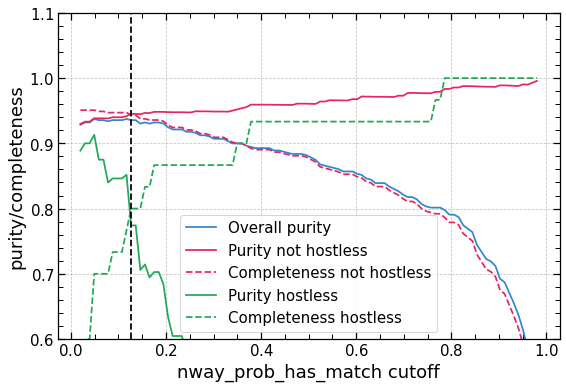

p_any cut: 0.13

                Total validation set: 559
                	 Total hostless: 30
                	 Total not hostless: 529
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 499
                	 Correct not hostless with incorrect ctp: 23
                	 Incorrect not hostless: 6
                Assigned hostless:
                	 Incorrect hostless: 7
                	 Correct hostless: 24

                Overall purity: 0.94
                Not hostless purity: 0.95
                Not hostless completeness: 0.94
                Hostless purity: 0.77
                Hostless completeness: 0.80
            


In [8]:
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match

_ = assess_goodnes_of_cross_match(nway_res.query('nway_match_flag==1'), p_any_cut=0.13)

 Completeness = 98% 
 Purity = 98% 
 nway_prob_has_match optimal cutoff =  0.12 
 Fraction of sources with prob_has_match > 0.12 = 97%


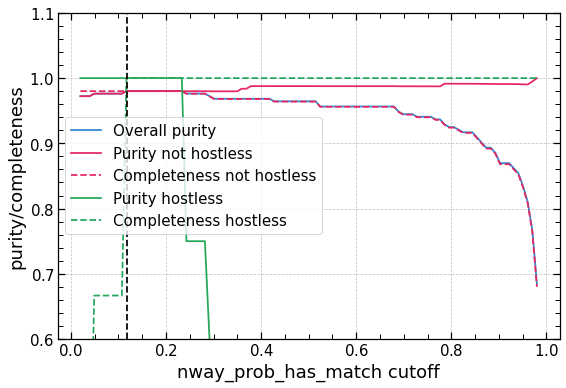

p_any cut: 0.12

                Total validation set: 253
                	 Total hostless: 3
                	 Total not hostless: 250
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 245
                	 Correct not hostless with incorrect ctp: 5
                	 Incorrect not hostless: 0
                Assigned hostless:
                	 Incorrect hostless: 0
                	 Correct hostless: 3

                Overall purity: 0.98
                Not hostless purity: 0.98
                Not hostless completeness: 0.98
                Hostless purity: 1.00
                Hostless completeness: 1.00
            


In [10]:
_ = assess_goodnes_of_cross_match(nway_res.query('nway_match_flag==1 & `flux_05-20`>1e-14'), p_any_cut=0.12)
